# Cryptocurrency Portfolio Analysis

## Notebook Initialization and Configuration

### Add Imports

In [19]:
import pandas as pd
from pathlib import Path
from pycoingecko import CoinGeckoAPI
from datetime import datetime, date
from MCForecastTools import MCSimulation
import numpy as np
import matplotlib.ticker as mticker


### Add Configuration

In [62]:
TICKERS = ['BTC', 'ETH', 'BNB', 'DASH', 'LTC']
CG_TICKER_IDS = ['binancecoin', 'bitcoin', 'ethereum','litecoin', 'solana']
NUM_TRADING_DAYS = 252
NUM_SIMULATIONS = 1000
TIMEFRAME = '1D'
START_DATE_ET = '2018-01-01'
END_DATE_ET = '2021-11-05'
EXAMPLE_INVESTMENT = 10000

## Retrieve, Prepare, and Store Data

### Identify CoinGecko IDs

In [3]:
cg = CoinGeckoAPI()

coins = cg.get_coins_list()

for coin in coins:
    for ticker in TICKERS:
        if str.upper(coin['symbol']) == ticker:
            print(coin)
            

{'id': 'binancecoin', 'symbol': 'bnb', 'name': 'Binance Coin'}
{'id': 'binance-peg-litecoin', 'symbol': 'ltc', 'name': 'Binance-Peg Litecoin'}
{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin'}
{'id': 'dash', 'symbol': 'dash', 'name': 'Dash'}
{'id': 'ethereum', 'symbol': 'eth', 'name': 'Ethereum'}
{'id': 'litecoin', 'symbol': 'ltc', 'name': 'Litecoin'}
{'id': 'oec-binance-coin', 'symbol': 'BNB', 'name': 'OEC Binance Coin'}


In [33]:
# get epoch times
start_date = pd.Timestamp(START_DATE_ET, tz='America/New_York').timestamp()
end_date = pd.Timestamp(END_DATE_ET, tz='America/New_York').timestamp()
print(start_date)
print(end_date)

1514782800.0
1636084800.0
<class 'float'>


### Retrieve and Examine Data

In [5]:
btc = cg.get_coin_market_chart_range_by_id('bitcoin','usd', start_date, end_date)
eth = cg.get_coin_market_chart_range_by_id('ethereum','usd', start_date, end_date)
bnb = cg.get_coin_market_chart_range_by_id('binancecoin','usd', start_date, end_date)
dash = cg.get_coin_market_chart_range_by_id('dash','usd', start_date, end_date)
ltc = cg.get_coin_market_chart_range_by_id('litecoin','usd', start_date, end_date)

In [6]:
print('Dicionaries in response')
print('=======================')
for category in btc:
    display(category)

print('Prices Dictionary')
print('=================')
display(btc['prices'])

Dicionaries in response


'prices'

'market_caps'

'total_volumes'

Prices Dictionary


[[1514851200000, 15321.9328517642],
 [1514937600000, 15583.8855377593],
 [1515024000000, 15976.365194174],
 [1515110400000, 18336.9229801691],
 [1515196800000, 18343.6624934071],
 [1515283200000, 17039.8739138488],
 [1515369600000, 15900.3650216006],
 [1515456000000, 15604.7234082405],
 [1515542400000, 15509.2701268168],
 [1515628800000, 14050.5696063543],
 [1515715200000, 14759.294629915],
 [1515801600000, 15193.3148979847],
 [1515888000000, 14476.5889713691],
 [1515974400000, 14411.9977069182],
 [1516060800000, 11723.9135206658],
 [1516147200000, 11415.3928442768],
 [1516233600000, 11569.4249920858],
 [1516320000000, 11758.4693327652],
 [1516406400000, 13260.2711872786],
 [1516492800000, 11703.5048628599],
 [1516579200000, 10991.5950130802],
 [1516665600000, 10894.0009053405],
 [1516752000000, 11277.1159704489],
 [1516838400000, 11225.2544568853],
 [1516924800000, 11044.9072365744],
 [1517011200000, 11456.2135062799],
 [1517097600000, 11665.6969300847],
 [1517184000000, 11157.6638878

### Prepare DataFrames by Coin

In [7]:
def create_market_history_df(coingecko_prices, symbol):
    df = pd.DataFrame(data=coingecko_prices['prices'], columns=['timestamp', 'close'])
    df['symbol'] = symbol
    return df

In [42]:
btc_df = create_market_history_df(btc,'BTC')
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'], unit='ms')
btc_df

,timestamp,close,symbol
0,2018-01-02,15321.932852,BTC
1,2018-01-03,15583.885538,BTC
2,2018-01-04,15976.365194,BTC
3,2018-01-05,18336.922980,BTC
4,2018-01-06,18343.662493,BTC
...,...,...,...
1399,2021-11-01,61471.868463,BTC
1400,2021-11-02,61121.831201,BTC
1401,2021-11-03,63247.208961,BTC
1402,2021-11-04,63130.942352,BTC


In [43]:
eth_df = create_market_history_df(eth,'ETH')
eth_df['timestamp'] = pd.to_datetime(eth_df['timestamp'], unit='ms')
eth_df


,timestamp,close,symbol
0,2018-01-02,876.890259,ETH
1,2018-01-03,963.055751,ETH
2,2018-01-04,978.416104,ETH
3,2018-01-05,1004.894972,ETH
4,2018-01-06,1052.023360,ETH
...,...,...,...
1399,2021-11-01,4292.040472,ETH
1400,2021-11-02,4330.553152,ETH
1401,2021-11-03,4596.593091,ETH
1402,2021-11-04,4607.699273,ETH


In [44]:
bnb_df = create_market_history_df(bnb,'BNB')
bnb_df['timestamp'] = pd.to_datetime(bnb_df['timestamp'], unit='ms')
bnb_df

,timestamp,close,symbol
0,2018-01-02,9.090393,BNB
1,2018-01-03,9.886323,BNB
2,2018-01-04,9.675758,BNB
3,2018-01-05,16.488523,BNB
4,2018-01-06,24.369905,BNB
...,...,...,...
1399,2021-11-01,524.704933,BNB
1400,2021-11-02,551.288568,BNB
1401,2021-11-03,555.342759,BNB
1402,2021-11-04,569.416459,BNB


In [45]:
dash_df = create_market_history_df(dash,'DASH')
dash_df['timestamp'] = pd.to_datetime(dash_df['timestamp'], unit='ms')
dash_df

,timestamp,close,symbol
0,2018-01-02,1194.636229,DASH
1,2018-01-03,1161.002029,DASH
2,2018-01-04,1177.132089,DASH
3,2018-01-05,1149.211144,DASH
4,2018-01-06,1220.513780,DASH
...,...,...,...
1399,2021-11-01,192.492360,DASH
1400,2021-11-02,190.391716,DASH
1401,2021-11-03,200.976128,DASH
1402,2021-11-04,201.255394,DASH


In [46]:
ltc_df = create_market_history_df(ltc,'LTC')
ltc_df['timestamp'] = pd.to_datetime(ltc_df['timestamp'], unit='ms')
ltc_df


,timestamp,close,symbol
0,2018-01-02,255.048185,LTC
1,2018-01-03,248.042194,LTC
2,2018-01-04,244.834372,LTC
3,2018-01-05,254.138525,LTC
4,2018-01-06,289.930033,LTC
...,...,...,...
1399,2021-11-01,191.987114,LTC
1400,2021-11-02,198.151499,LTC
1401,2021-11-03,201.133134,LTC
1402,2021-11-04,207.324165,LTC


### Prepare Cryptocurrency Portfolio DataFrame

In [47]:
prices_df = pd.concat([btc_df, eth_df, bnb_df, dash_df, ltc_df]) \
    .pivot_table(index="timestamp",columns="symbol")
prices_df = prices_df.swaplevel(axis=1)
prices_df

symbol,BNB,BTC,DASH,ETH,LTC
,close,close,close,close,close
timestamp,,,,,
2018-01-02,9.090393,15321.932852,1194.636229,876.890259,255.048185
2018-01-03,9.886323,15583.885538,1161.002029,963.055751,248.042194
2018-01-04,9.675758,15976.365194,1177.132089,978.416104,244.834372
2018-01-05,16.488523,18336.922980,1149.211144,1004.894972,254.138525
2018-01-06,24.369905,18343.662493,1220.513780,1052.023360,289.930033
...,...,...,...,...,...
2021-11-01,524.704933,61471.868463,192.492360,4292.040472,191.987114
2021-11-02,551.288568,61121.831201,190.391716,4330.553152,198.151499


### Store Raw Data

In [48]:
prices_df.to_csv(Path('../data/crypto_raw.csv'))

### Clean and Store Data

In [49]:
#Check for non-float data types and missing data
display(prices_df.dtypes)
display(prices_df.isnull().sum())

prices_df = prices_df.dropna()
display(prices_df.isnull().sum())

prices_df.to_csv(Path('../data/crypto_clean.csv'))

symbol       
BNB     close    float64
BTC     close    float64
DASH    close    float64
ETH     close    float64
LTC     close    float64
dtype: object

symbol       
BNB     close    8
BTC     close    8
DASH    close    8
ETH     close    8
LTC     close    8
dtype: int64

symbol       
BNB     close    0
BTC     close    0
DASH    close    0
ETH     close    0
LTC     close    0
dtype: int64

## Analyze Data

### Calculate Daily Returns (aggregated)

In [50]:
closing_prices_df = prices_df.xs('close',axis='columns',level=1)

daily_returns_df = closing_prices_df.sum(axis=1).pct_change().dropna()

print('DAILY RETURNS')
print('=============')
daily_returns_df

DAILY RETURNS


timestamp
2018-01-03    0.017458
2018-01-04    0.023408
2018-01-05    0.129184
2018-01-06    0.008132
2018-01-07   -0.059629
                ...   
2021-11-01   -0.005805
2021-11-02   -0.004213
2021-11-03    0.036285
2021-11-04   -0.001230
2021-11-05   -0.023303
Length: 1401, dtype: float64

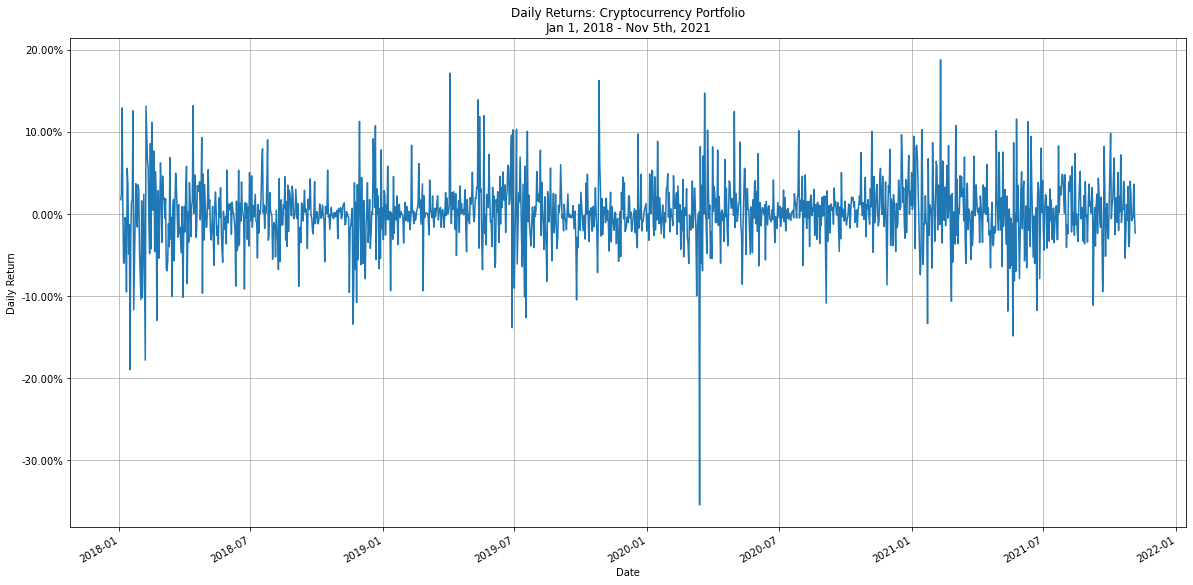

In [51]:
plot = daily_returns_df.plot(title='Daily Returns: Cryptocurrency Portfolio\n'
                            'Jan 1, 2018 - Nov 5th, 2021',
                            figsize=(20,10))
plot.set (xlabel='Date', ylabel='Daily Return')
ticks_loc = plot.get_yticks().tolist()
plot.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
plot.set_yticklabels(['{:,.2%}'.format(x) for x in ticks_loc])
plot.grid()

### Calculate Cumulative Return

In [76]:
cumulative_returns_df = (1 + daily_returns_df).cumprod() - 1

print('CUMULATIVE RETURNS')
print('==================')
cumulative_returns_df

CUMULATIVE RETURNS


timestamp
2018-01-03    0.017458
2018-01-04    0.041275
2018-01-05    0.175792
2018-01-06    0.185354
2018-01-07    0.114672
                ...   
2021-11-01    2.775887
2021-11-02    2.759980
2021-11-03    2.896411
2021-11-04    2.891619
2021-11-05    2.800931
Length: 1401, dtype: float64

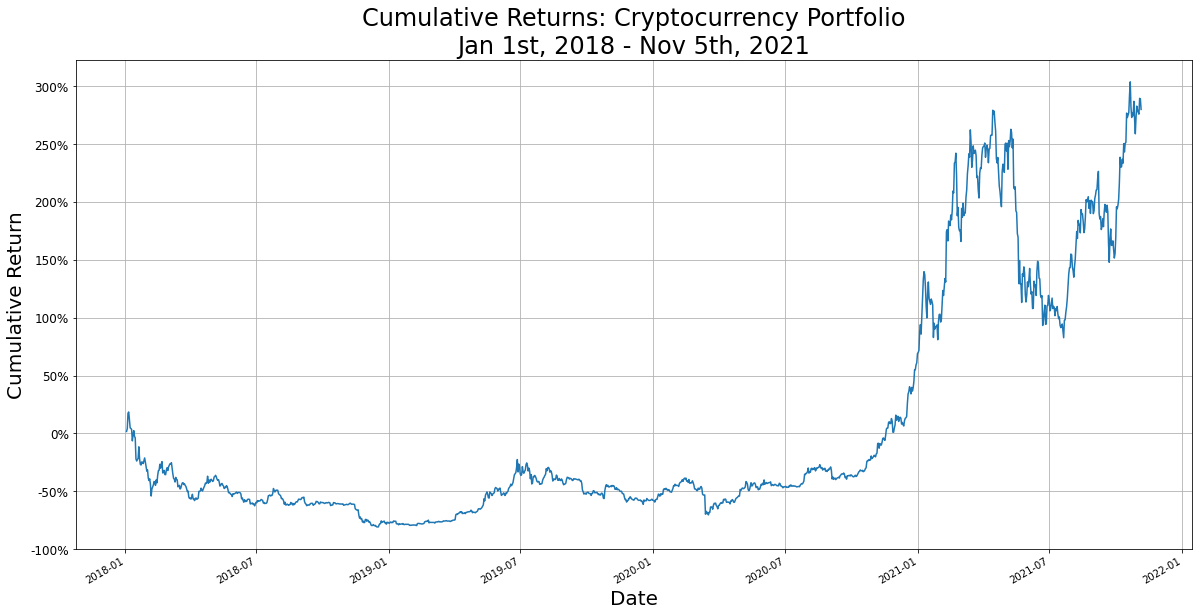

In [79]:
plot = cumulative_returns_df.plot(title='Cumulative Returns: Cryptocurrency Portfolio\n'
                                'Jan 1st, 2018 - Nov 5th, 2021',
                                figsize=(20,10))

#format the y-axis
title =  plot.get_title()
plot.set_title(title, fontdict={'fontsize':24})
plot.set_xlabel('Date', fontdict={'fontsize':20})
plot.set_ylabel('Cumulative Return', fontdict={'fontsize':20})
yticks_loc = plot.get_yticks().tolist()
plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
plot.set_yticklabels(['{:,.0%}'.format(x) for x in yticks_loc],fontdict={'fontsize':12})

plot.grid()

### Analyze the Volatility

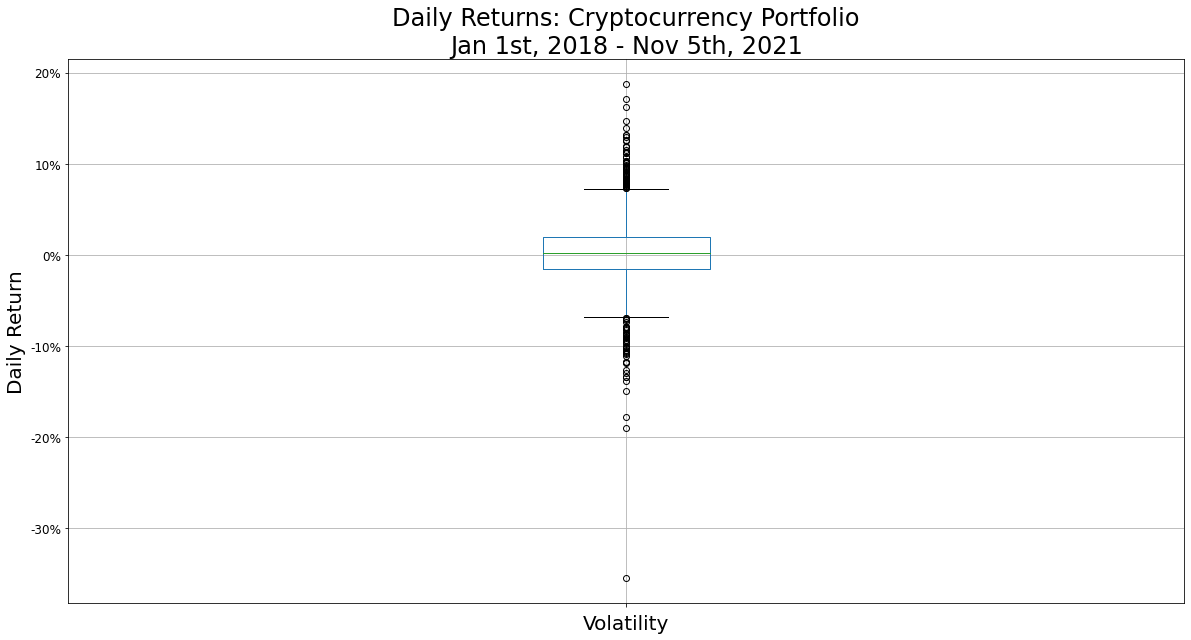

In [86]:
plot = daily_returns_df.plot(kind='box',
                        title='Daily Returns: Cryptocurrency Portfolio\n'
                        'Jan 1st, 2018 - Nov 5th, 2021',
                        figsize=(20,10))


#format the y-axis
title =  plot.get_title()
plot.set_title(title, fontdict={'fontsize':24})
plot.set_xlabel('Volatility', fontdict={'fontsize':20})
plot.set_ylabel('Daily Return', fontdict={'fontsize':20})
yticks_loc = plot.get_yticks().tolist()
plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
plot.set_yticklabels(['{:,.0%}'.format(x) for x in yticks_loc],fontdict={'fontsize':12})
plot.set_xticklabels('')

plot.grid()

### Analyze the Risk

In [87]:
daily_returns_std_df = daily_returns_df.std()
print('DAILY RETURNS STANDARD DEVIATION')
print('================================')
daily_returns_std_df

DAILY RETURNS STANDARD DEVIATION


0.039926696301994836

In [88]:
daily_returns_annualized_std_df = daily_returns_df.std() * np.sqrt(NUM_TRADING_DAYS)
print('ANNUALIZED STANDARD DEVIATION')
print('=============================')
daily_returns_annualized_std_df

ANNUALIZED STANDARD DEVIATION


0.6338166545248836

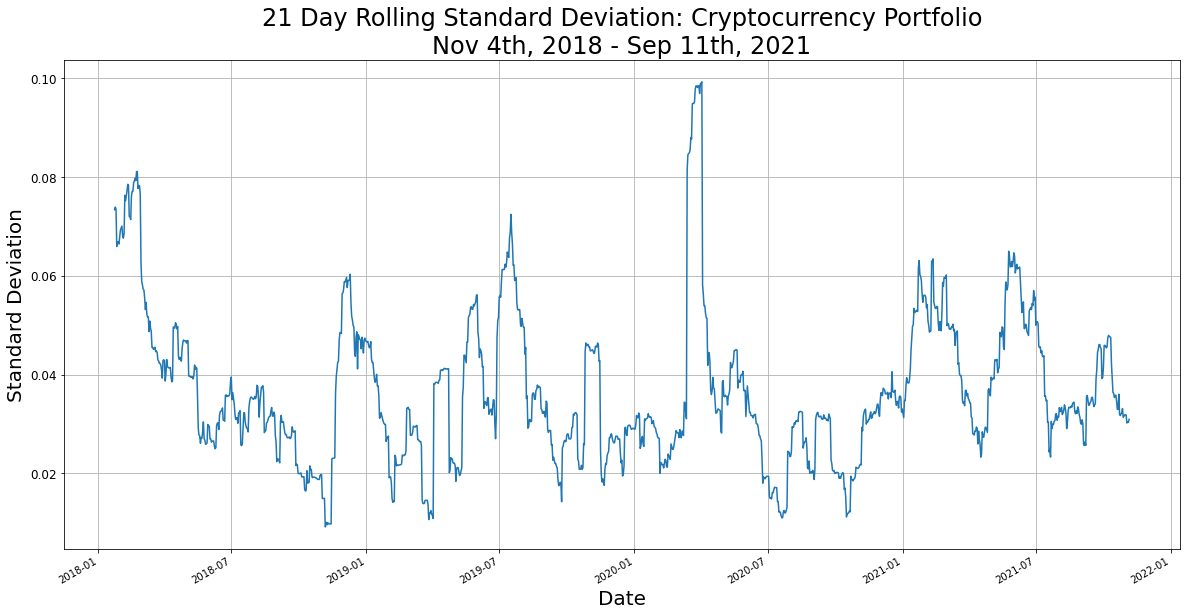

In [89]:
daily_returns_std_21_df = daily_returns_df.rolling(window=21).std()
plot = daily_returns_std_21_df.plot(title='21 Day Rolling Standard Deviation: Cryptocurrency Portfolio\n'
                                        'Nov 4th, 2018 - Sep 11th, 2021',
                                        figsize=(20,10))
plot.set (xlabel='Date', ylabel='Standard Deviation')

#format the y-axis
title =  plot.get_title()
plot.set_title(title, fontdict={'fontsize':24})
plot.set_xlabel('Date', fontdict={'fontsize':20})
plot.set_ylabel('Standard Deviation', fontdict={'fontsize':20})
yticks_loc = plot.get_yticks().tolist()
plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
plot.set_yticklabels(['{:.2f}'.format(x) for x in yticks_loc],fontdict={'fontsize':12})

plot.grid()

### Analyze the Risk-Return Profile

In [90]:
average_annual_return_df = daily_returns_df.mean() * NUM_TRADING_DAYS
print("AVERAGE ANNUAL RETURN")
print("=====================")
average_annual_return_df

AVERAGE ANNUAL RETURN


0.44490768945256043

In [91]:
sharpe_ratio = average_annual_return_df / daily_returns_annualized_std_df
print("SHARPE RATIO")
print("=============")
sharpe_ratio

SHARPE RATIO


0.701950140117521

### Run 10 Year Monte Carlo Simulation

In [92]:
years = 10
# weights default to being split evenly if not passed
mc = MCSimulation(
                portfolio_data = prices_df,
                num_simulation = NUM_SIMULATIONS,
                num_trading_days = NUM_TRADING_DAYS * years)

mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989900,0.980735,1.038482,1.018768,0.979282,1.017919,0.991228,1.043341,1.010057,0.984976,...,1.021683,0.986472,1.004842,1.030295,1.010000,0.984313,0.999374,1.020645,1.010378,1.033675
2,0.992892,0.987544,0.988409,1.005902,1.010128,1.045660,1.006525,1.037376,1.017135,1.002527,...,1.014131,0.964203,1.024014,1.035796,1.048724,0.978333,0.972096,1.055379,1.003007,1.035393
3,1.020858,0.920686,0.982079,1.013042,1.005383,1.093156,1.049622,1.050286,1.011945,0.968351,...,1.015923,1.005689,1.010323,1.049108,1.041557,1.032546,0.931208,1.017066,0.994002,1.016367
4,1.016047,0.946917,0.989373,1.024440,1.013188,1.117132,1.003787,1.058185,0.999875,0.970847,...,1.033769,0.998915,1.041647,1.095935,1.055980,1.038966,0.909643,1.019186,0.999765,1.006259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,67.472850,449.581057,144.290866,1906.639140,29.776720,87.891852,18.103013,33.965745,311.192550,282.671897,...,327.669663,389.919777,51.911926,844.654880,104.261926,46.143087,284.290647,49.018084,48.507072,57.337024
2517,69.784182,475.111369,146.338812,1958.474290,29.725777,86.725141,17.578231,34.594506,312.965334,289.235020,...,332.586389,400.322163,53.840602,842.052282,104.892770,46.389419,283.711178,49.207473,47.458797,58.200246
2518,68.997882,489.462477,147.291649,1986.960067,29.646469,85.404199,17.436251,34.173700,326.436118,297.626105,...,322.882277,406.049912,49.731721,874.022292,103.504946,46.366038,296.315591,48.960447,48.760017,56.681945
2519,70.115305,516.198474,148.328851,1948.452701,29.889669,85.520669,17.398147,33.527526,311.378398,290.642071,...,319.790299,420.748016,50.650328,881.653920,103.167882,45.311464,308.104446,46.536085,47.956260,56.891667


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

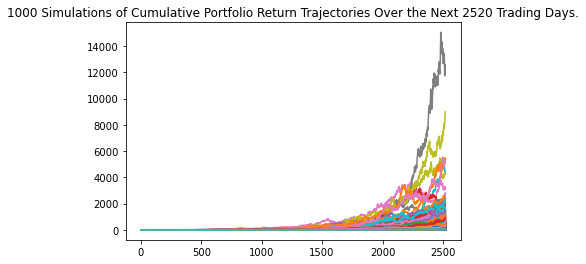

In [93]:
mc.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

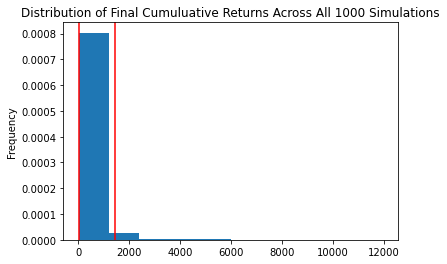

In [94]:
mc.plot_distribution()

### Calculate 10 Year Cumulative Returns

In [95]:
mc_cumulative_returns = mc.summarize_cumulative_return()
print(f'{years} year Monte Carlo summary statistics for Cryptocurrency.')
print(mc_cumulative_returns)

10 year Monte Carlo summary statistics for Cryptocurrency.
count            1000.000000
mean              304.491977
std               654.798342
min                 3.646119
25%                57.475946
50%               135.286147
75%               324.637928
max             11952.978123
95% CI Lower       11.607464
95% CI Upper     1449.488490
Name: 2520, dtype: float64


In [96]:
lower_return = mc_cumulative_returns[8] * EXAMPLE_INVESTMENT
upper_return = mc_cumulative_returns[9] * EXAMPLE_INVESTMENT

print(f"Using a 95% confidence interval, the expected return of the "
    f"cryptocurrency portfolio is between {mc_cumulative_returns[8]: ,.2f}% "
    f"and {mc_cumulative_returns[9]: ,.2f}%. An initial example "
    f"investment of ${EXAMPLE_INVESTMENT: ,.2f} would be worth between "
    f"${lower_return: ,.2f} and ${upper_return: ,.2f} in {years} years")

Using a 95% confidence interval, the expected return of the cryptocurrency portfolio is between  11.61% and  1,449.49%. An initial example investment of $ 10,000.00 would be worth between $ 116,074.64 and $ 14,494,884.90 in 10 years


### Run 30 year Monte Carlo Simulation 

In [97]:
years = 30
# weights default to being split evenly if not passed
mc = MCSimulation(
                portfolio_data = prices_df,
                num_simulation = NUM_SIMULATIONS,
                num_trading_days = NUM_TRADING_DAYS * years)

mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
1,9.947425e-01,9.820628e-01,1.008348e+00,1.024051,1.013707e+00,9.934796e-01,0.991789,0.966555,1.010583,0.961136,...,1.011368e+00,9.977492e-01,0.997010,1.022727,1.021269e+00,1.016449e+00,9.905687e-01,9.334471e-01,0.966452,1.015397e+00
2,9.696835e-01,9.974168e-01,9.996332e-01,1.027747,1.024204e+00,1.023345e+00,1.004531,0.991003,1.009320,0.993494,...,1.027796e+00,1.006301e+00,0.948047,1.047849,1.043174e+00,1.016060e+00,1.004918e+00,9.232671e-01,0.961178,1.031194e+00
3,1.025983e+00,9.799064e-01,1.015931e+00,1.010351,1.008447e+00,1.002817e+00,1.050602,1.000172,1.029670,0.990942,...,1.016265e+00,1.007929e+00,0.934121,1.070985,1.023961e+00,9.742395e-01,9.826903e-01,9.255725e-01,0.977098,1.007964e+00
4,1.073475e+00,1.008178e+00,1.088171e+00,1.033406,1.012780e+00,1.032887e+00,1.031028,0.974063,1.033592,1.002110,...,1.021645e+00,1.025234e+00,0.898416,1.057284,9.783168e-01,9.928817e-01,1.030253e+00,9.435046e-01,0.989296,1.036229e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.808719e+07,1.500799e+06,6.040919e+06,337602.136782,4.444260e+07,4.436499e+06,259391.869261,651116.073823,958085.192806,96785.939248,...,8.478974e+06,2.426660e+07,230995.892971,265149.825535,3.405792e+06,4.911764e+07,1.138306e+07,1.326775e+06,220617.167648,1.749963e+06
7557,1.777793e+07,1.529136e+06,6.142303e+06,338834.314247,4.703094e+07,4.536430e+06,263301.626027,662511.902845,931324.528268,95302.908923,...,8.522561e+06,2.459517e+07,229852.920768,266222.534137,3.318191e+06,4.647978e+07,1.173700e+07,1.327451e+06,220237.690486,1.789469e+06
7558,1.827233e+07,1.547178e+06,5.885528e+06,333682.335983,4.781332e+07,4.518481e+06,255678.050215,665943.201073,911855.558390,101807.649325,...,8.517302e+06,2.479313e+07,239176.455791,273399.461246,3.259121e+06,4.691740e+07,1.157444e+07,1.330024e+06,229160.322950,1.769560e+06
7559,1.814933e+07,1.582006e+06,6.148814e+06,348639.542890,4.777836e+07,4.361457e+06,255440.122636,663862.313924,928637.668056,102945.839352,...,8.614175e+06,2.460797e+07,250945.011592,273684.090546,3.217919e+06,4.563700e+07,1.216751e+07,1.306683e+06,221874.124896,1.801671e+06


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

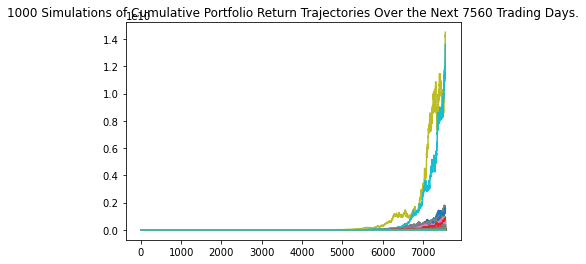

In [98]:
mc.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

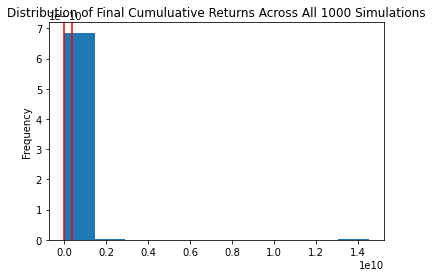

In [99]:
mc.plot_distribution()

### Calculate 30 Year Cumulative Returns

In [100]:
mc_cumulative_returns = mc.summarize_cumulative_return()
print(f'{years} year Monte Carlo summary statistics for Real Estate.')
print(mc_cumulative_returns)

30 year Monte Carlo summary statistics for Real Estate.
count           1.000000e+03
mean            6.521448e+07
std             6.437122e+08
min             2.364164e+03
25%             8.321736e+05
50%             3.632637e+06
75%             1.577490e+07
max             1.450166e+10
95% CI Lower    6.708622e+04
95% CI Upper    3.841033e+08
Name: 7560, dtype: float64


In [101]:
lower_return = mc_cumulative_returns[8] * EXAMPLE_INVESTMENT
upper_return = mc_cumulative_returns[9] * EXAMPLE_INVESTMENT

print(f"Using a 95% confidence interval, the expected returns of the "
    f"cryptocurrency portfolio is between {mc_cumulative_returns[8]: ,.2f}% "
    f"and {mc_cumulative_returns[9]: ,.2f}%. An initial example "
    f"investment of ${EXAMPLE_INVESTMENT: ,.2f} would be worth between "
    f"${lower_return: ,.2f} and ${upper_return: ,.2f} in {years} years")

Using a 95% confidence interval, the expected returns of the cryptocurrency portfolio is between  67,086.22% and  384,103,281.08%. An initial example investment of $ 10,000.00 would be worth between $ 670,862,228.92 and $ 3,841,032,810,809.77 in 30 years
